<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/003_superstore_SALES_trends_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction: Time-Based Sales Analysis**

This notebook focuses on analyzing **sales trends over time** to gain a comprehensive understanding of how the company’s performance evolves across various time intervals. By examining sales data through temporal dimensions such as **year**, **month**, and **day**, we aim to uncover seasonal patterns, year-over-year growth, and daily fluctuations. This foundational analysis will provide valuable context for deeper investigations into regional and categorical sales performance in future notebooks.

---

#### **Objectives**
1. **Identify Long-Term Trends**:
   - Analyze **yearly sales performance** to evaluate growth or decline over time.

2. **Uncover Seasonal Patterns**:
   - Explore **monthly sales trends** to identify peaks and troughs throughout the year.

3. **Understand Daily Dynamics**:
   - Examine sales by **day of the week** and **day of the month** to detect recurring patterns or anomalies in customer purchasing behavior.

---

#### **Why Focus on Time?**
- **Foundation for Deeper Analysis**:
  Time-based trends affect every aspect of sales performance, from product categories to regional performance. Establishing a temporal baseline helps contextualize these later analyses.
  
- **Actionable Insights**:
  Understanding when sales peak or dip can inform strategies for inventory management, marketing campaigns, and resource allocation during high-demand periods.

- **Company Growth**:
  Yearly trends reveal the company’s overall trajectory, while monthly and daily patterns highlight operational strengths and areas for improvement.

---

#### **Expected Outcomes**
- A clear picture of how sales fluctuate over time, providing the foundation for:
  - Benchmarking regional and categorical performance against overall trends.
  - Identifying actionable time-based patterns to optimize business strategies.

By starting with a time-based analysis, we set the stage for a data-driven exploration of deeper sales dynamics in subsequent notebooks.



## Import & Process Data

Dataset loaded successfully!
Missing Data:  0
Step 0: Removing outliers from column 'Sales'...

Column: Sales
Original Dataset: 9994 rows
Non-Outliers: 8827 rows (88.32%)
Outliers: 1167 rows (11.68%)


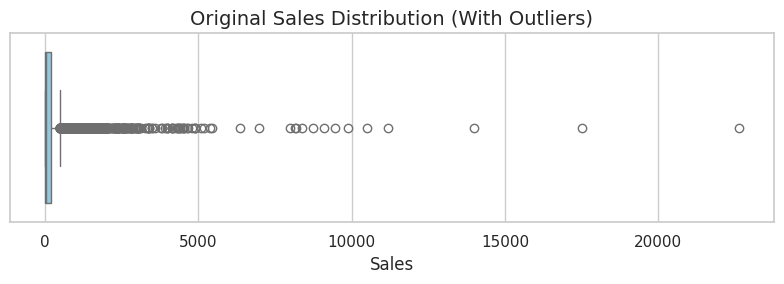

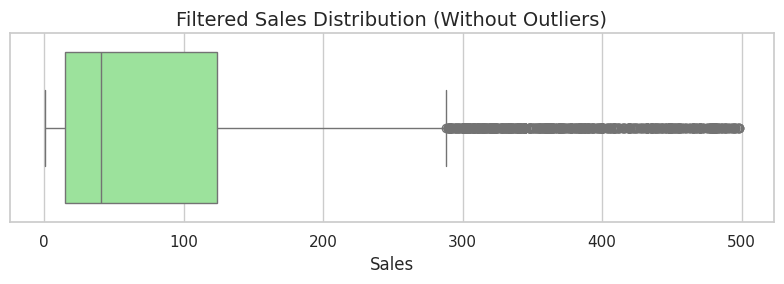

Outliers detected: 1167 rows sequestered for separate analysis.

Step 1: Preprocessing the data...
Step 2: Adding time-based columns...
Step 3: Converting to category and visualizing...



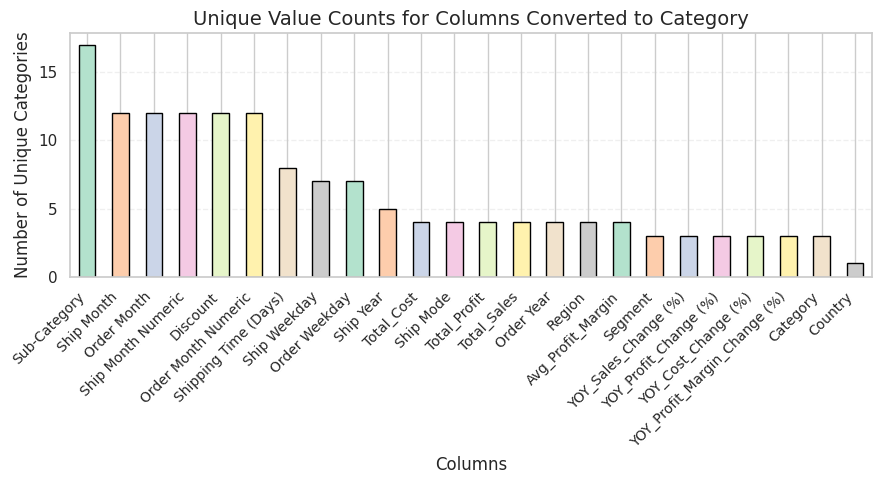


Step 4: Removing duplicates...
Removed 0 duplicate rows.
Step 5: Standardizing selected categorical columns...

Step 6: Ordering categorical columns...
Step 7: Adding abbreviated columns...
Data preparation completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8827 entries, 0 to 8826
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Row ID                        8827 non-null   int64         
 1   Order ID                      8827 non-null   object        
 2   Order Date                    8827 non-null   datetime64[ns]
 3   Ship Date                     8827 non-null   datetime64[ns]
 4   Ship Mode                     8827 non-null   category      
 5   Customer ID                   8827 non-null   object        
 6   Customer Name                 8827 non-null   object        
 7   Segment                       8827 non-null   category      
 8   Country  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the updated script
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu
importlib.reload(dpu)

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())

# Prepare the dataset
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.prepare_data(data, outlier_column='Sales', exclude_columns=exclude_columns)

# Final check
print(data.info())

## Sales Distribution Visualizations

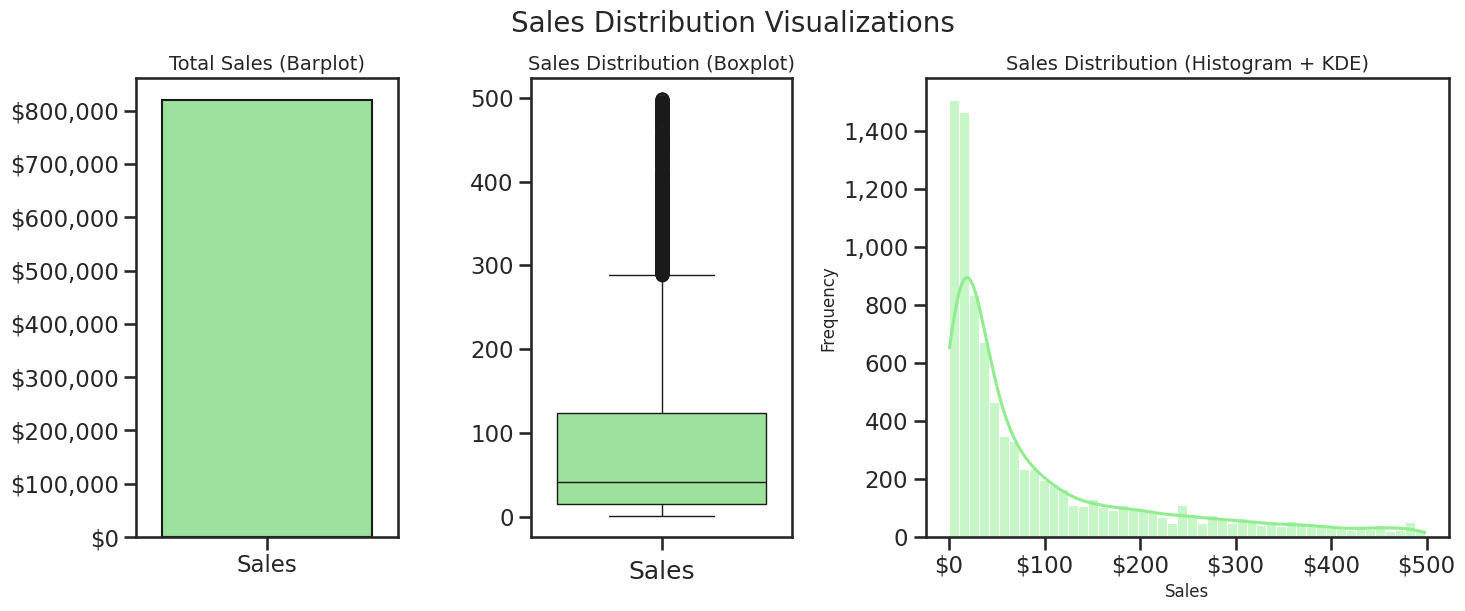

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
dvu.plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen')

### Sales: Descriptive Statistics

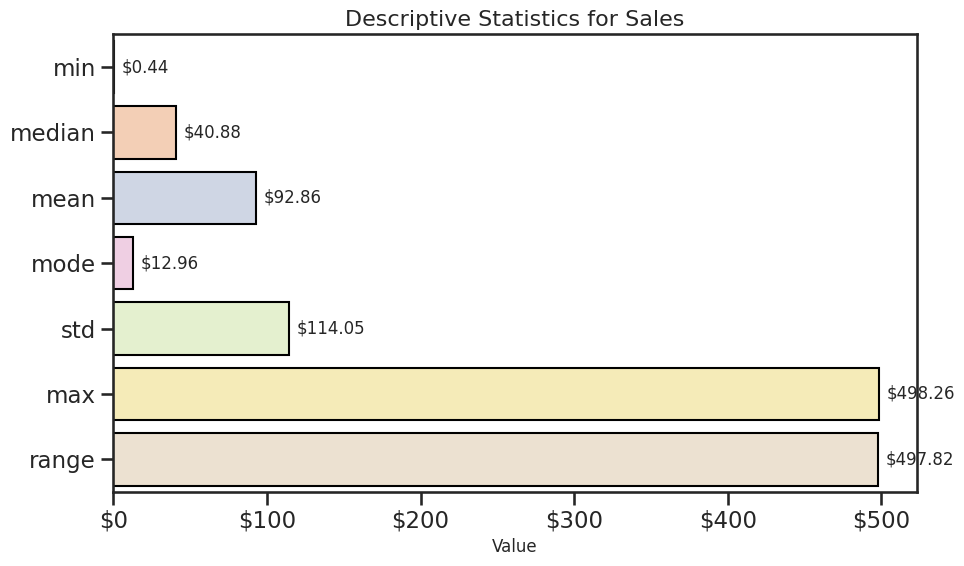

In [ ]:
stats = dvu.calculate_stats(data, 'Sales')
dvu.plot_descriptive_stats(stats, column_name="Sales", color_palette="Pastel2")

### Derived Metrics: Enhancing Insights

To maximize the analytical potential of our dataset, we created a series of derived metrics. These metrics provide deeper insights into profitability, customer behavior, shipping efficiency, and regional performance. Below is a summary of the derived metrics we added:

1. **Profit Margin**:
   - **Formula**: `(Profit / Sales) * 100`
   - **Purpose**: Measures profitability as a percentage of sales, helping us identify high-margin products or categories.

2. **Profitability Ratio**:
   - **Formula**: `(Profit / Estimated Cost) * 100`
   - **Purpose**: Highlights the profitability relative to costs, offering insights into the financial performance of products and regions.

3. **Average Order Value (AOV)**:
   - **Formula**: `Total Sales / Number of Orders`
   - **Purpose**: Calculates the average revenue per order, offering insights into customer purchasing behavior.



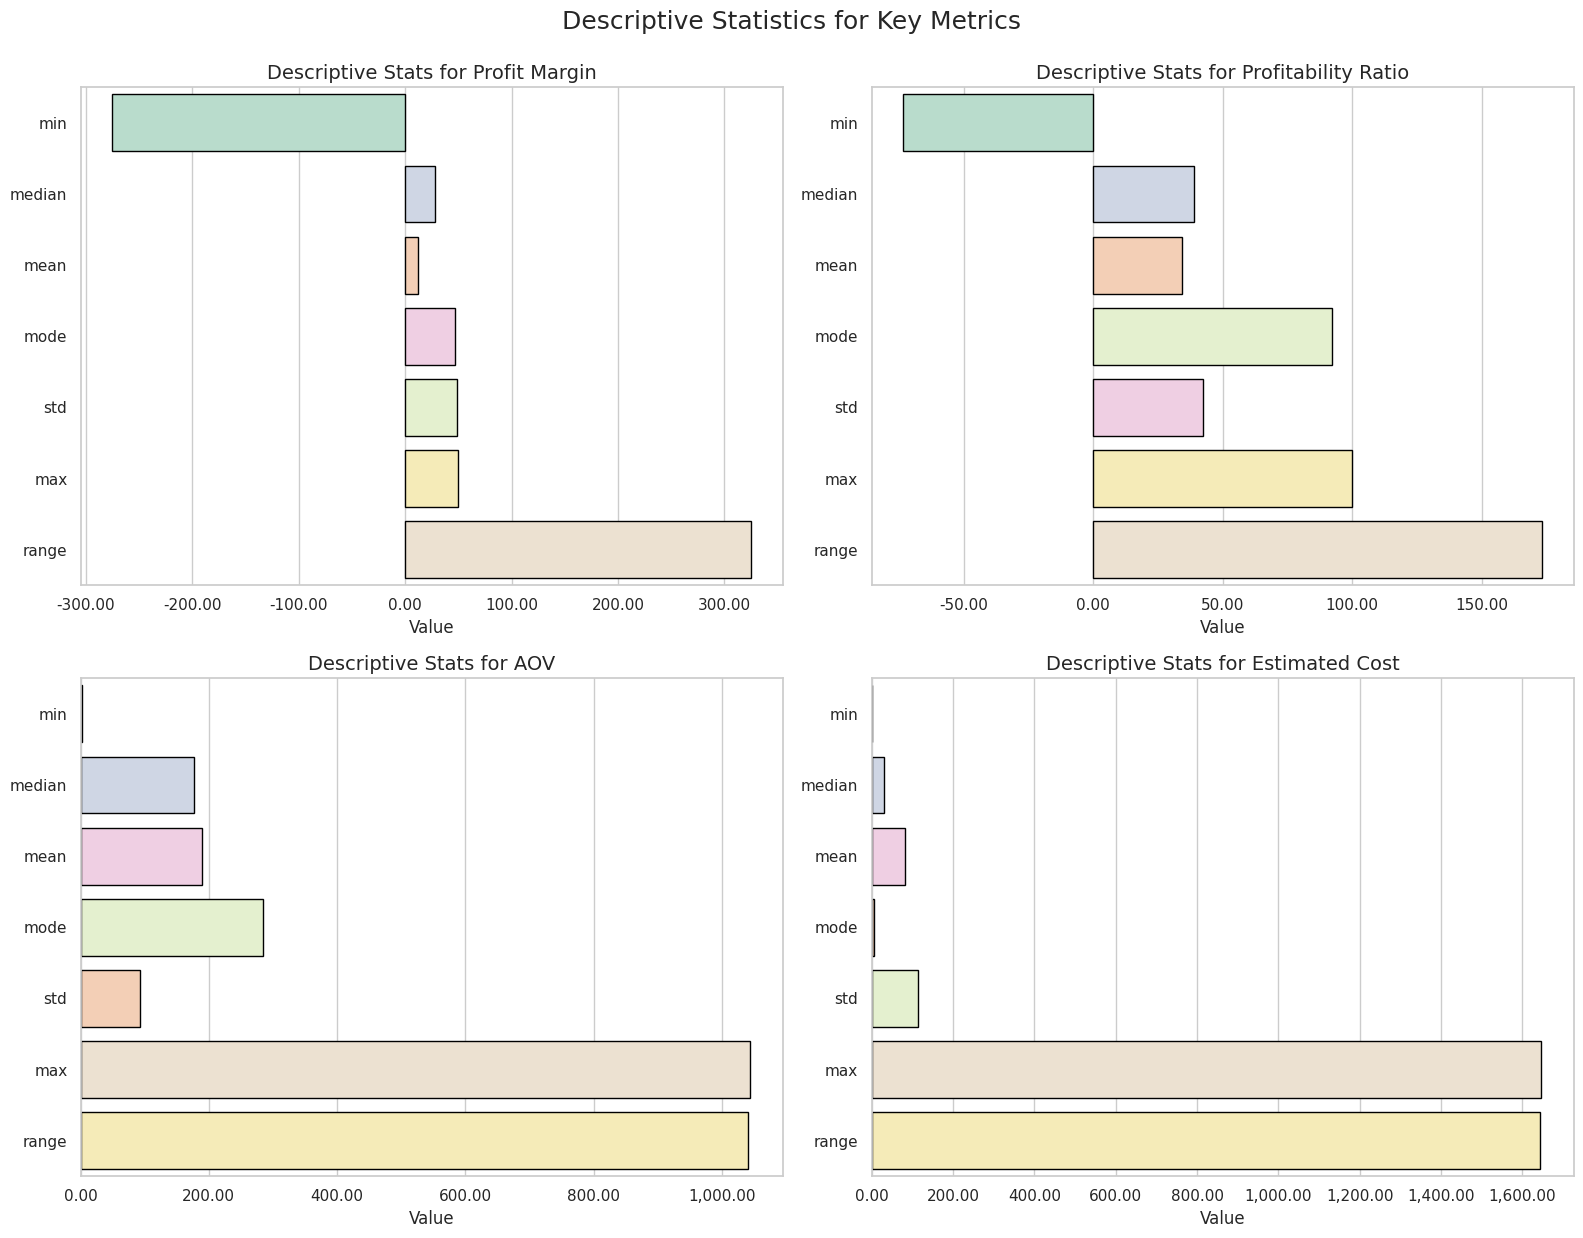

In [ ]:
# Columns to analyze
columns_to_analyze = ['Profit Margin', 'Profitability Ratio', 'AOV', 'Estimated Cost']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = "Pastel2"

# Iterate through columns and corresponding axes
for col, ax in zip(columns_to_analyze, axes.flatten()):
    # Calculate stats for the column
    stats = dvu.calculate_stats(data, col)

    # Create a DataFrame for stats
    stats_df = pd.DataFrame({
        "Statistic": stats.keys(),
        "Value": stats.values()
    })

    # Create the barplot
    sns.barplot(
        data=stats_df,
        x="Value", y="Statistic",
        hue="Value", palette=color_palette,
        edgecolor="black",legend=False,
        ax=ax
    )

    # Format the plot
    ax.set_title(f"Descriptive Stats for {col}", fontsize=14)
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("")
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Descriptive Statistics for Key Metrics", fontsize=18, y=1.03)
plt.show()


## Sales by Year

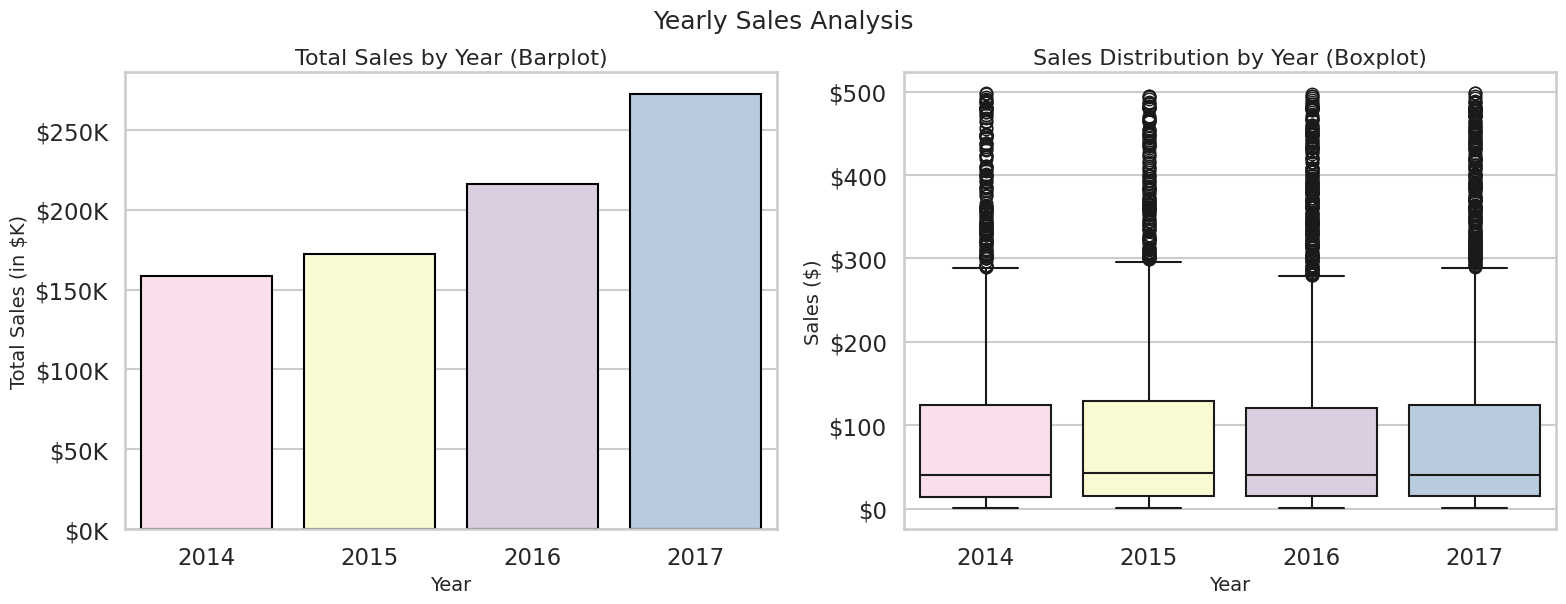

In [ ]:
# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = "Pastel1_r"

# Step 1: Aggregate sales by year
yearly_sales = data.groupby('Order Year', observed=True)['Sales'].sum()

# Step 2: Convert sales to thousands for readability
yearly_sales_k = yearly_sales / 1000

# Step 3: Create a 1x2 grid for visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total Sales by Year (Barplot)
sns.barplot(x=yearly_sales_k.index, y=yearly_sales_k.values,
    hue=yearly_sales_k.index, palette=palette, edgecolor="black", ax=axes[0], legend=False
)
axes[0].set_title("Total Sales by Year (Barplot)", fontsize=16)
axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Total Sales (in $K)", fontsize=14)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))

# Plot 2: Sales Distribution by Year (Boxplot)
sns.boxplot(data=data, x="Order Year", y="Sales",
    hue="Order Year", palette=palette, linecolor='k', linewidth=1.5, ax=axes[1], legend=False
)
axes[1].set_title("Sales Distribution by Year (Boxplot)", fontsize=16)
axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Sales ($)", fontsize=14)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Yearly Sales Analysis", fontsize=18, y=1.02)
plt.show()


### Key Metrics by Year

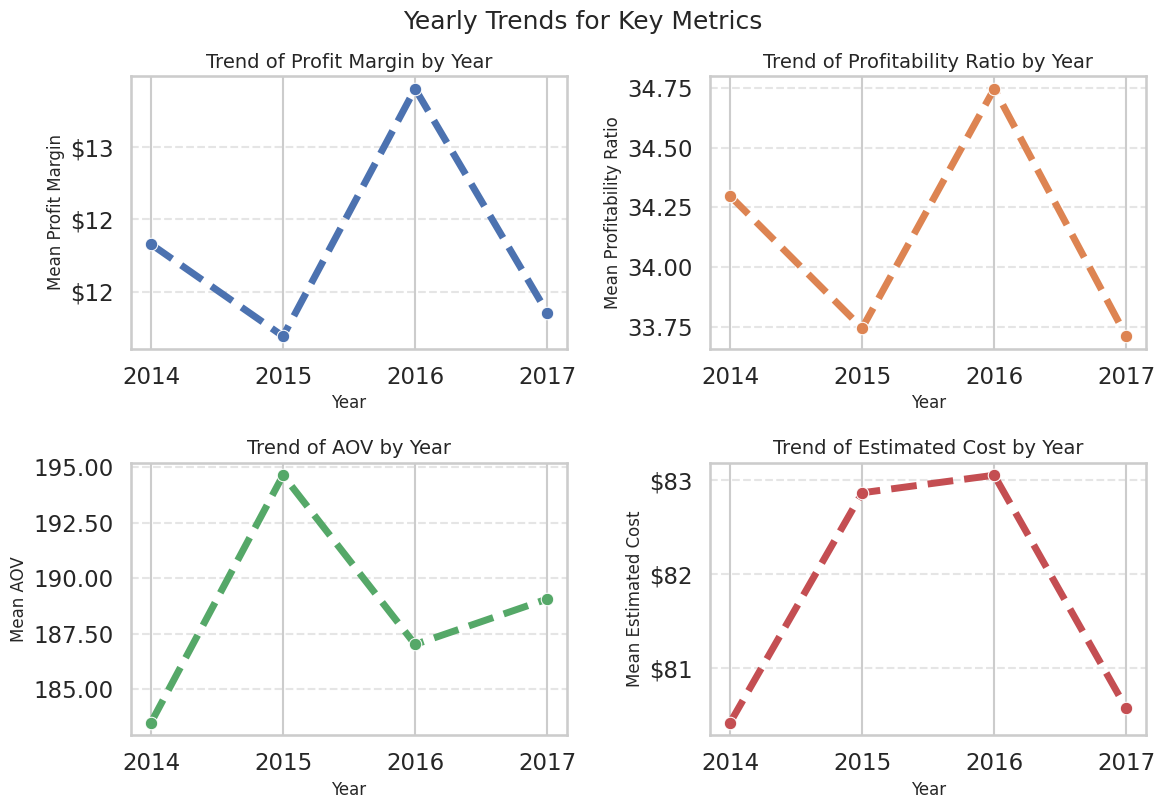

In [ ]:
# Define the metrics to analyze
columns_to_analyze = ['Profit Margin', 'Profitability Ratio', 'AOV', 'Estimated Cost']

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Loop through the metrics and create line plots
for i, column in enumerate(columns_to_analyze):
    row, col = divmod(i, 2)  # Determine subplot position (row, column)

    # Lineplot: Metric trends by year
    yearly_metric = data.groupby('Order Year', observed=True)[column].mean().reset_index()
    sns.lineplot(
        data=yearly_metric,
        x='Order Year',
        y=column,
        marker='o',
        color=f"C{i}",  # Use different colors for each plot
        linewidth=5,linestyle='--',
        ax=axes[row, col]
    )

    # Format the plot
    axes[row, col].set_title(f"Trend of {column} by Year", fontsize=14)
    axes[row, col].set_xlabel("Year", fontsize=12)
    axes[row, col].set_ylabel(f"Mean {column}", fontsize=12)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.5)
    if column in ['Profitability Ratio', 'AOV']:  # Non-currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    else:  # Currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Yearly Trends for Key Metrics", fontsize=18, y=1.02)
plt.show()


#### **Month & Weekday Ordering Function Explanation**

**Ordered Key Calendar Variables**:
   - Assigned a specific order to the `Order Month` & `Order Weekday` columns based on the calendar month sequence (January through December) and weekdays (Monday through Sunday).

#### **Why It Was Necessary**
- By default, categorical columns in pandas are unordered, which can lead to misleading or confusing visualizations and analyses.
  - Example: Without ordering, months or weekdays might appear alphabetically in charts, breaking the natural sequence (e.g., "April" could precede "January" or "Friday" could precede "Monday").
- Ordering the categories ensures:
  - Logical progression in visualizations (e.g., line plots, bar charts).
  - Correct grouping and aggregation during analysis.

#### **Verification**
The categorical ordering was verified by printing the `.cat.categories` of the `Order Month` and `Order Weekday` columns:



In [ ]:
def order_categorical_columns(data):
    """
    Assigns a specific order to key categorical columns for proper visualization and analysis.

    Args:
        data (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: The updated dataset with ordered categorical columns.
    """
    # Define the specific order for weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Define the specific order for months
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Assign weekday order if the column exists
    if 'Order Weekday' in data.columns:
        data['Order Weekday'] = pd.Categorical(
            data['Order Weekday'],
            categories=weekday_order,
            ordered=True
        )

    # Assign month order if the column exists
    if 'Order Month' in data.columns:
        data['Order Month'] = pd.Categorical(
            data['Order Month'],
            categories=month_order,
            ordered=True
        )

    return data

In [ ]:
print(data['Order Month'].cat.categories)
print(data['Order Weekday'].cat.categories)

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')
Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')


## Sales by Month


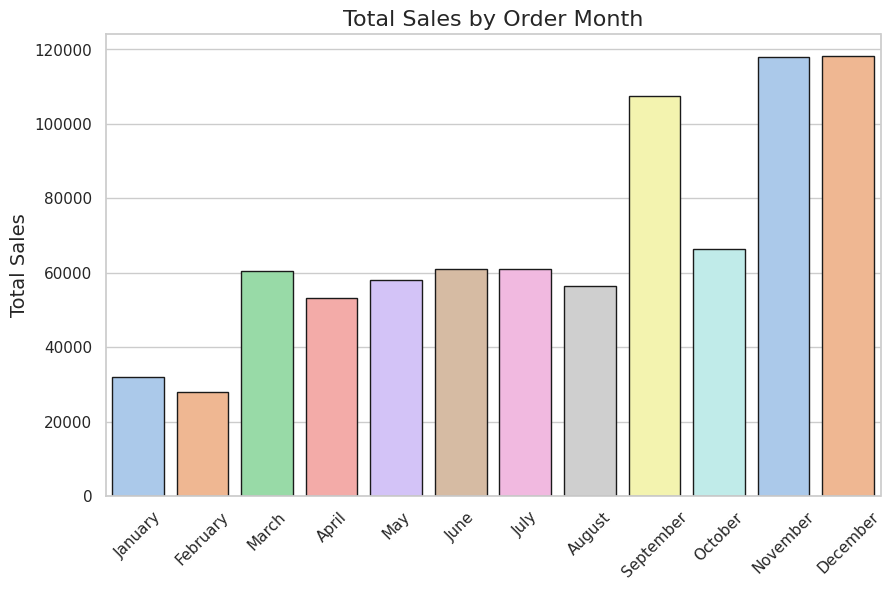

In [ ]:
# Aggregate sales by order month
monthly_sales = data.groupby('Order Month', observed=True)['Sales'].sum()

# Plot sales by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, palette='pastel', edgecolor='k',
            order=monthly_sales.index)
plt.title('Total Sales by Order Month', fontsize=16)
plt.xlabel('')
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

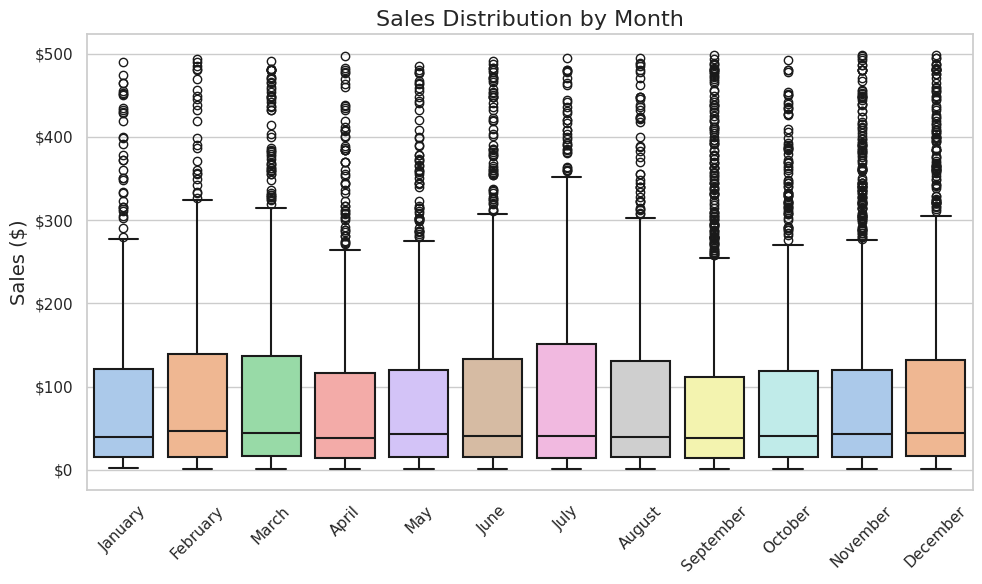

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2"

# Create the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    data=data,
    x="Order Month",
    y="Sales",
    hue='Order Month', palette='pastel', linecolor='k',
    showfliers=True,  # Show outliers
    linewidth=1.5
)

# Add labels and title
plt.title("Sales Distribution by Month", fontsize=16)
# plt.xlabel("Month", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Sales ($)", fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.show()


### **Add Abbreviated Columns for Plotting**

When visualizing time-based data like months and weekdays, full names can make plots overly cluttered, particularly in cases where:

1. **Limited Space**:
   - Full names of months ("January", "February", etc.) and weekdays ("Wednesday", "Thursday", etc.) take up more space on the x-axis, leading to overlapping labels, reduced readability, and visual clutter.

2. **Compact Design**:
   - Using abbreviated names (e.g., "Jan", "Feb", "Wed", "Thu") creates a more compact and clean design, allowing viewers to focus on the trends or insights rather than struggling to read long axis labels.

3. **Professional Appearance**:
   - Abbreviations give the chart a polished and professional appearance, especially in dashboards or presentations where space efficiency and clarity are priorities.

### **Practical Benefits for Analysis**
- **Consistency Across Charts**: Shortened labels ensure that all visualizations maintain a consistent and compact format.
- **Improved Readability**: Abbreviated labels prevent unnecessary distractions, enabling viewers to grasp the key insights quickly.
- **Time-Saving**: By mapping abbreviations programmatically and using ordered categories, you avoid manual adjustments for each plot.

By adding `Order Month Abbrev` and `Order Weekday Abbrev`, we ensure that the axis labels remain concise and that the order of months and weekdays is preserved for accurate and aesthetically pleasing visualizations.



In [ ]:
def add_abbreviated_columns(data):
    """
    Adds abbreviated versions of 'Order Month' and 'Order Weekday' columns to the dataset,
    ensures they are stored as categorical types with the correct order.

    Args:
        data (pd.DataFrame): The dataset with ordered 'Order Month' and 'Order Weekday'.

    Returns:
        pd.DataFrame: The dataset with new abbreviated columns.
    """
    # Define abbreviations for months and weekdays
    month_order = {
        "January": "Jan", "February": "Feb", "March": "Mar", "April": "Apr",
        "May": "May", "June": "Jun", "July": "Jul", "August": "Aug",
        "September": "Sep", "October": "Oct", "November": "Nov", "December": "Dec"
    }

    weekday_order = {
        "Monday": "Mon", "Tuesday": "Tue", "Wednesday": "Wed", "Thursday": "Thu",
        "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"
    }

    # Map abbreviations to create new columns
    data['Order Month Abbrev'] = data['Order Month'].map(month_order)
    data['Order Weekday Abbrev'] = data['Order Weekday'].map(weekday_order)

    # Ensure the new columns are categorical with the correct order
    abbrev_month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    abbrev_weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    data['Order Month Abbrev'] = pd.Categorical(
        data['Order Month Abbrev'],
        categories=abbrev_month_order,
        ordered=True
    )

    data['Order Weekday Abbrev'] = pd.Categorical(
        data['Order Weekday Abbrev'],
        categories=abbrev_weekday_order,
        ordered=True
    )

    return data

# apply function
data = add_abbreviated_columns(data)
print(data['Order Month Abbrev'].cat.categories)
print(data['Order Weekday Abbrev'].cat.categories, '\n')

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')
Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='object') 



In [ ]:
# Aggregate sales by order month
monthly_sales = data.groupby(['Order Month', 'Order Month Abbrev'], observed=True)['Sales'].sum()
print(monthly_sales)

Order Month  Order Month Abbrev
January      Jan                    31911.0090
February     Feb                    27949.8704
March        Mar                    60351.2904
April        Apr                    53156.2521
May          May                    58021.9144
June         Jun                    61065.0348
July         Jul                    61027.8890
August       Aug                    56371.0245
September    Sep                   107526.8743
October      Oct                    66334.0502
November     Nov                   117834.1100
December     Dec                   118168.7363
Name: Sales, dtype: float64


In [ ]:
# Aggregate sales by weekday (using the abbreviated column)
weekday_sales = data.groupby(['Order Weekday', 'Order Weekday Abbrev'], observed=True)['Sales'].sum()
print(weekday_sales)

Order Weekday  Order Weekday Abbrev
Monday         Mon                     149249.4667
Tuesday        Tue                      90463.8634
Wednesday      Wed                      30947.2362
Thursday       Thu                     111595.8834
Friday         Fri                     154879.8511
Saturday       Sat                     136297.1788
Sunday         Sun                     146284.5758
Name: Sales, dtype: float64


Can you trust the results of this table?

1. **Key Matching in GroupBy**:
   - The `groupby` operation ensures that the aggregation (`sum` in this case) is performed for each unique combination of `Order Weekday` and `Order Weekday Abbrev`. Since `Order Weekday` and `Order Weekday Abbrev` are correctly mapped (e.g., "Monday" corresponds to "Mon"), the sums for each day align perfectly.

2. **No Overlap or Mismatch**:
   - If there were mismatches between `Order Weekday` and `Order Weekday Abbrev`, the `groupby` operation would create additional rows in the output for unmatched categories. This would be immediately noticeable, as you’d see duplicate entries for the same weekday with different abbreviations.

3. **Testing Consistency**:
   - You’ve already verified consistency by comparing the results of aggregating `Order Weekday` alone and `Order Weekday Abbrev` alone, and they matched perfectly. Adding both as keys in `groupby` simply creates a hierarchical index for more clarity without altering the sums.

### **Potential Error Scenarios**:
- If the mapping between `Order Weekday` and `Order Weekday Abbrev` was incorrect, the `groupby` table would show duplicate or unexpected rows. For instance:
  - **Incorrect Mapping**: If "Monday" was accidentally mapped to "Tue", the `groupby` output would create separate rows for "Monday - Tue" and "Tuesday - Tue," splitting or misallocating the sales values.
  - **Unordered Data**: If the categories were not properly ordered as categorical types, the `groupby` results might display in an arbitrary order, but the values themselves would still be correct.

### **Trust the Results**:
The numbers in your table are correct and trustworthy as long as:
1. The mapping between `Order Weekday` and `Order Weekday Abbrev` is accurate (which it is in your case).
2. No rows were unintentionally excluded or altered during preprocessing.

By using both columns in `groupby`, we've added a layer of redundancy that makes it easier to validate the correctness of the aggregation.

In [ ]:
# Aggregate sales by weekday (using the abbreviated column)
weekday_sales = data.groupby(['Order Weekday'], observed=True)['Sales'].sum()
print(weekday_sales, '\n')
# Aggregate sales by weekday (using the abbreviated column)
weekday_sales = data.groupby(['Order Weekday Abbrev'], observed=True)['Sales'].sum()
print(weekday_sales)

Order Weekday
Monday       149249.4667
Tuesday       90463.8634
Wednesday     30947.2362
Thursday     111595.8834
Friday       154879.8511
Saturday     136297.1788
Sunday       146284.5758
Name: Sales, dtype: float64 

Order Weekday Abbrev
Mon    149249.4667
Tue     90463.8634
Wed     30947.2362
Thu    111595.8834
Fri    154879.8511
Sat    136297.1788
Sun    146284.5758
Name: Sales, dtype: float64


### Key Metrics by Month

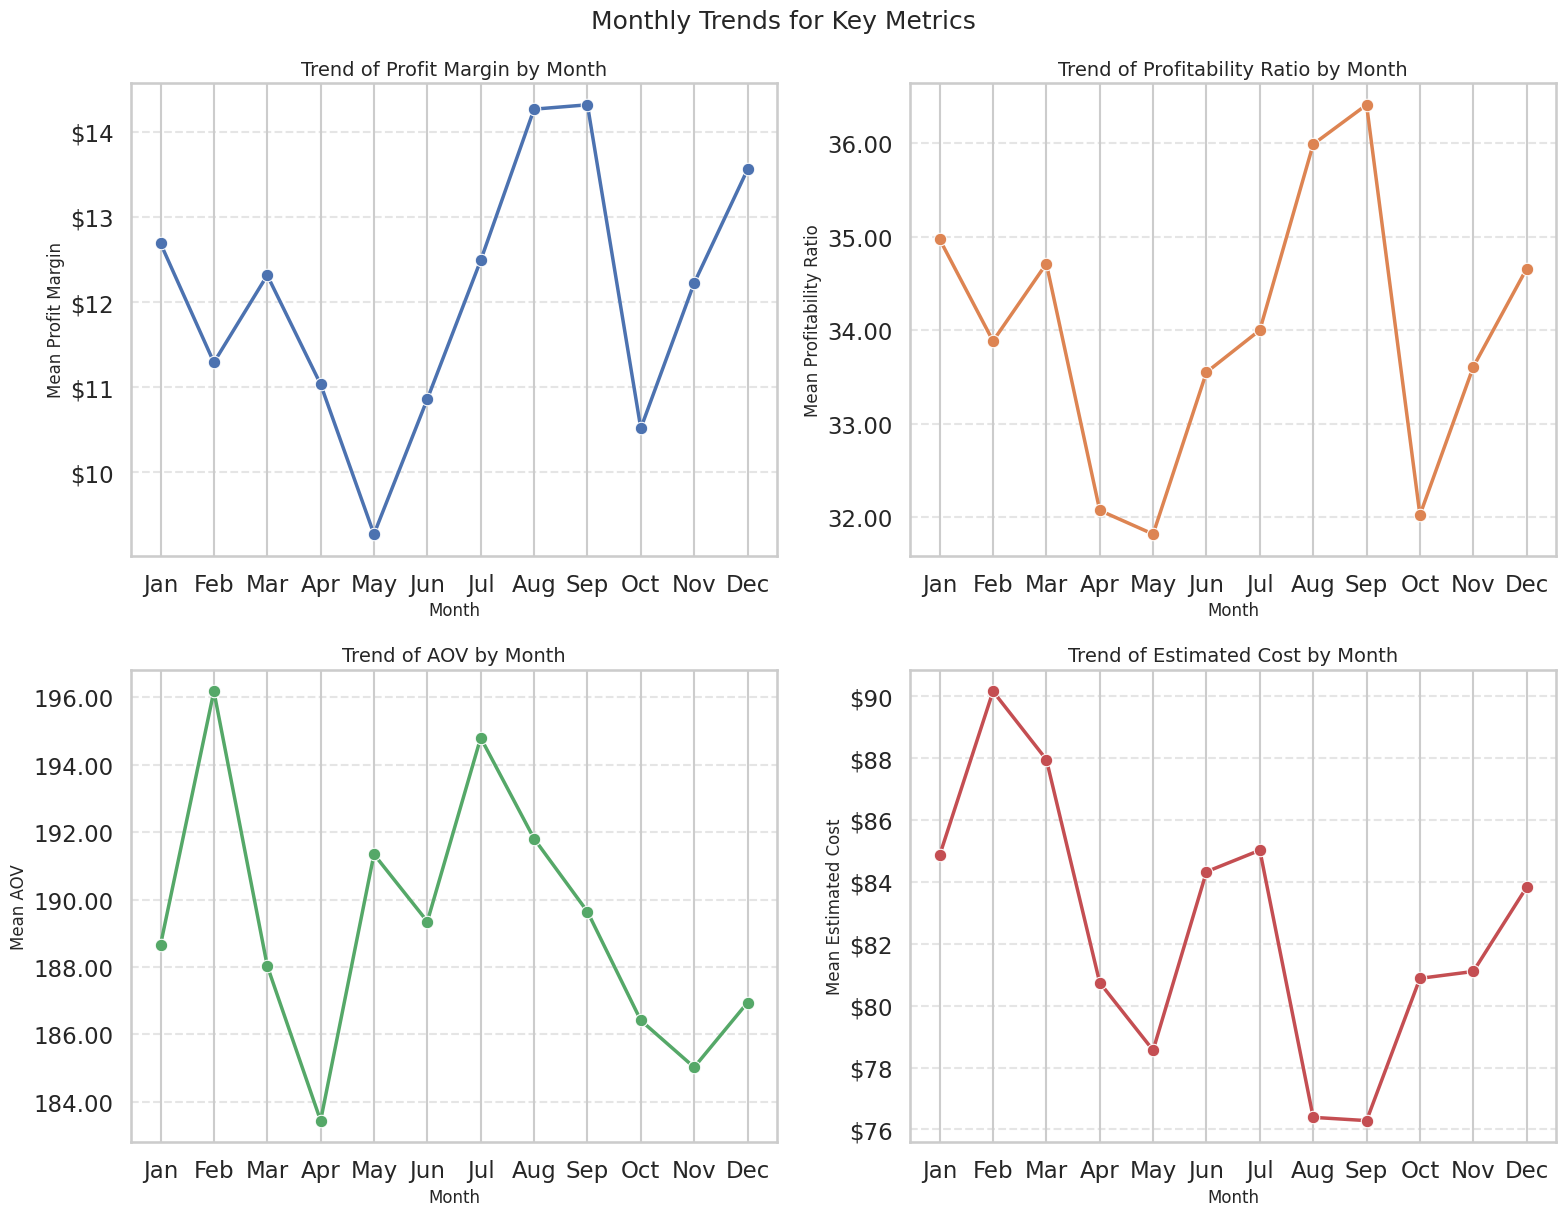

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loop through the metrics and create line plots
for i, column in enumerate(columns_to_analyze):
    row, col = divmod(i, 2)  # Determine subplot position (row, column)

    # Calculate mean of each metric by month
    monthly_metric = data.groupby('Order Month Abbrev', observed=True)[column].mean().reset_index()

    # Lineplot: Metric trends by month
    sns.lineplot(
        data=monthly_metric,
        x='Order Month Abbrev',
        y=column,
        marker='o',
        color=f"C{i}",  # Different colors for each metric
        linewidth=2.5,
        ax=axes[row, col]
    )

    # Format the plot
    axes[row, col].set_title(f"Trend of {column} by Month", fontsize=14)
    axes[row, col].set_xlabel("Month", fontsize=12)
    axes[row, col].set_ylabel(f"Mean {column}", fontsize=12)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.5)
    if column in ['Profitability Ratio', 'AOV']:  # Non-currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    else:  # Currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Monthly Trends for Key Metrics", fontsize=18, y=1.02)
plt.show()


In [ ]:

columns_to_analyze = ['Profit Margin', 'Profitability Ratio', 'AOV', 'Estimated Cost']
cta = data.groupby(['Order Year', 'Order Month Abbrev'], observed=True)[columns_to_analyze].mean().reset_index()
cta.head()

,Order Year,Order Month Abbrev,Profit Margin,Profitability Ratio,AOV,Estimated Cost
0,2014,Jan,11.254248,35.608987,179.435845,74.832510
1,2014,Feb,5.162963,34.555314,157.850722,55.038596
2,2014,Mar,14.549202,33.729395,185.622563,83.720955
3,2014,Apr,24.844234,44.038637,182.688861,77.807066
4,2014,May,12.173007,34.479280,181.344980,89.442647


In [ ]:
monthly_yearly_metric = (
    data.groupby(['Order Year', 'Order Month Abbrev'], observed=True)[column]
    .mean()
    .reset_index()
)
monthly_yearly_metric

NameError: name 'column' is not defined

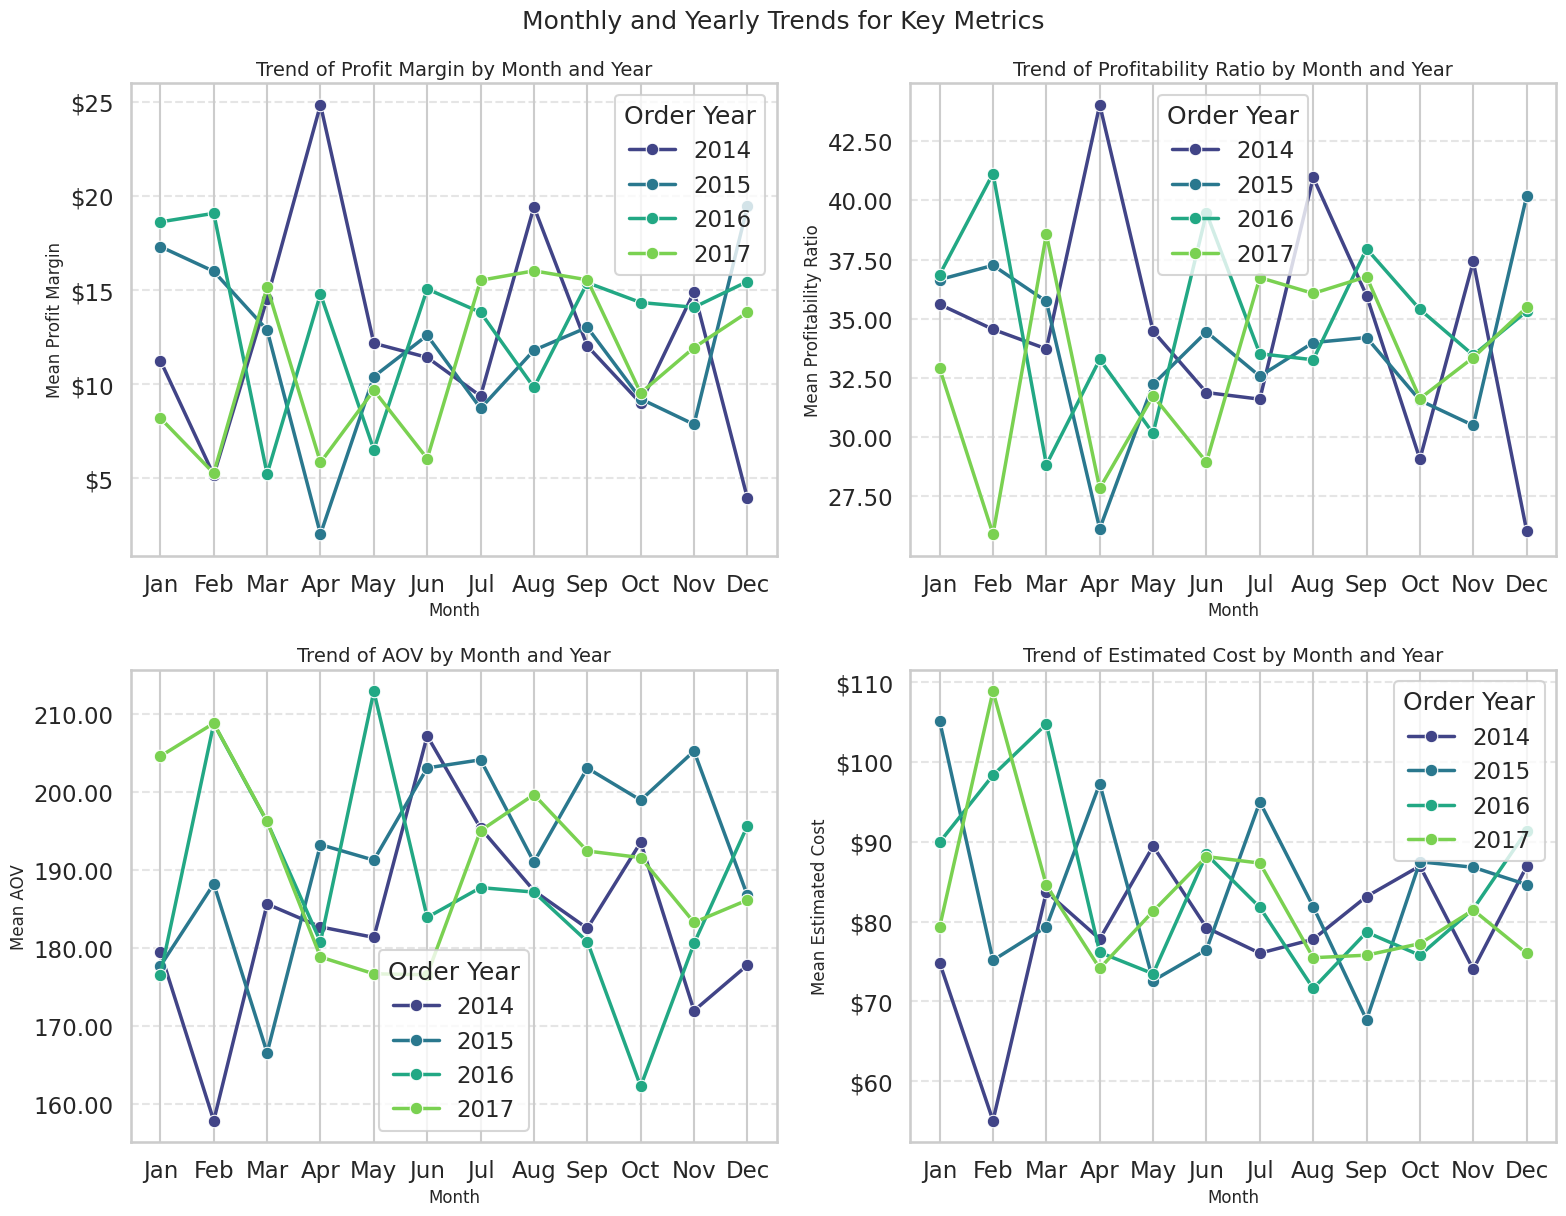

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Create a 2x2 grid for the metrics by month and year
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loop through the metrics and create line plots
for i, column in enumerate(columns_to_analyze):
    row, col = divmod(i, 2)  # Determine subplot position (row, column)

    # Calculate mean of each metric by month and year
    monthly_yearly_metric = (
        data.groupby(['Order Year', 'Order Month Abbrev'], observed=True)[column]
        .mean()
        .reset_index()
    )

    # Lineplot: Metric trends by month and year
    sns.lineplot(
        data=monthly_yearly_metric,
        x='Order Month Abbrev',
        y=column,
        hue='Order Year',
        palette='viridis',  # Different color for each year
        marker='o',
        linewidth=2.5,
        ax=axes[row, col]
    )

    # Format the plot
    axes[row, col].set_title(f"Trend of {column} by Month and Year", fontsize=14)
    axes[row, col].set_xlabel("Month", fontsize=12)
    axes[row, col].set_ylabel(f"Mean {column}", fontsize=12)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.5)
    if column in ['Profitability Ratio', 'AOV']:  # Non-currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    else:  # Currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Monthly and Yearly Trends for Key Metrics", fontsize=18, y=1.02)
plt.show()


## Sales by Weekday

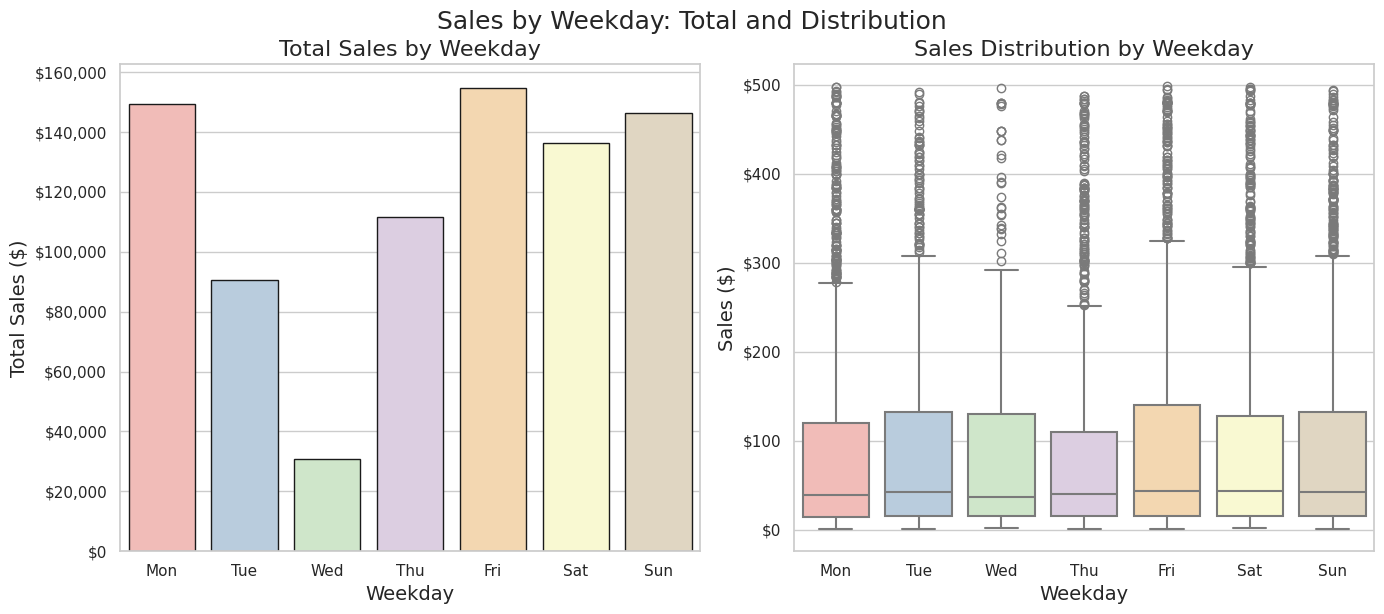

In [ ]:
# Aggregate sales by weekday (using the abbreviated column)
weekday_sales = data.groupby('Order Weekday Abbrev', observed=True)['Sales'].sum()

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel1"

# Define the abbreviated weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Barplot of total sales by weekday
sns.barplot(
    x=weekday_sales.index,
    y=weekday_sales.values,
    hue=weekday_sales.index, palette=palette,
    # order=weekday_order,  # Use the abbreviated order
    edgecolor="k",
    ax=axes[0]
)
axes[0].set_title("Total Sales by Weekday", fontsize=16)
axes[0].set_xlabel("Weekday", fontsize=14)
axes[0].set_ylabel("Total Sales ($)", fontsize=14)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Plot 2: Boxplot of sales by weekday
sns.boxplot(
    data=data,
    x="Order Weekday Abbrev",
    y="Sales",
    hue="Order Weekday Abbrev", palette=palette,
    # order=weekday_order,  # Use the abbreviated order
    showfliers=True,
    linewidth=1.5,
    ax=axes[1]
)
axes[1].set_title("Sales Distribution by Weekday", fontsize=16)
axes[1].set_xlabel("Weekday", fontsize=14)
axes[1].set_ylabel("Sales ($)", fontsize=14)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Sales by Weekday: Total and Distribution", fontsize=18, y=1.02)
plt.show()


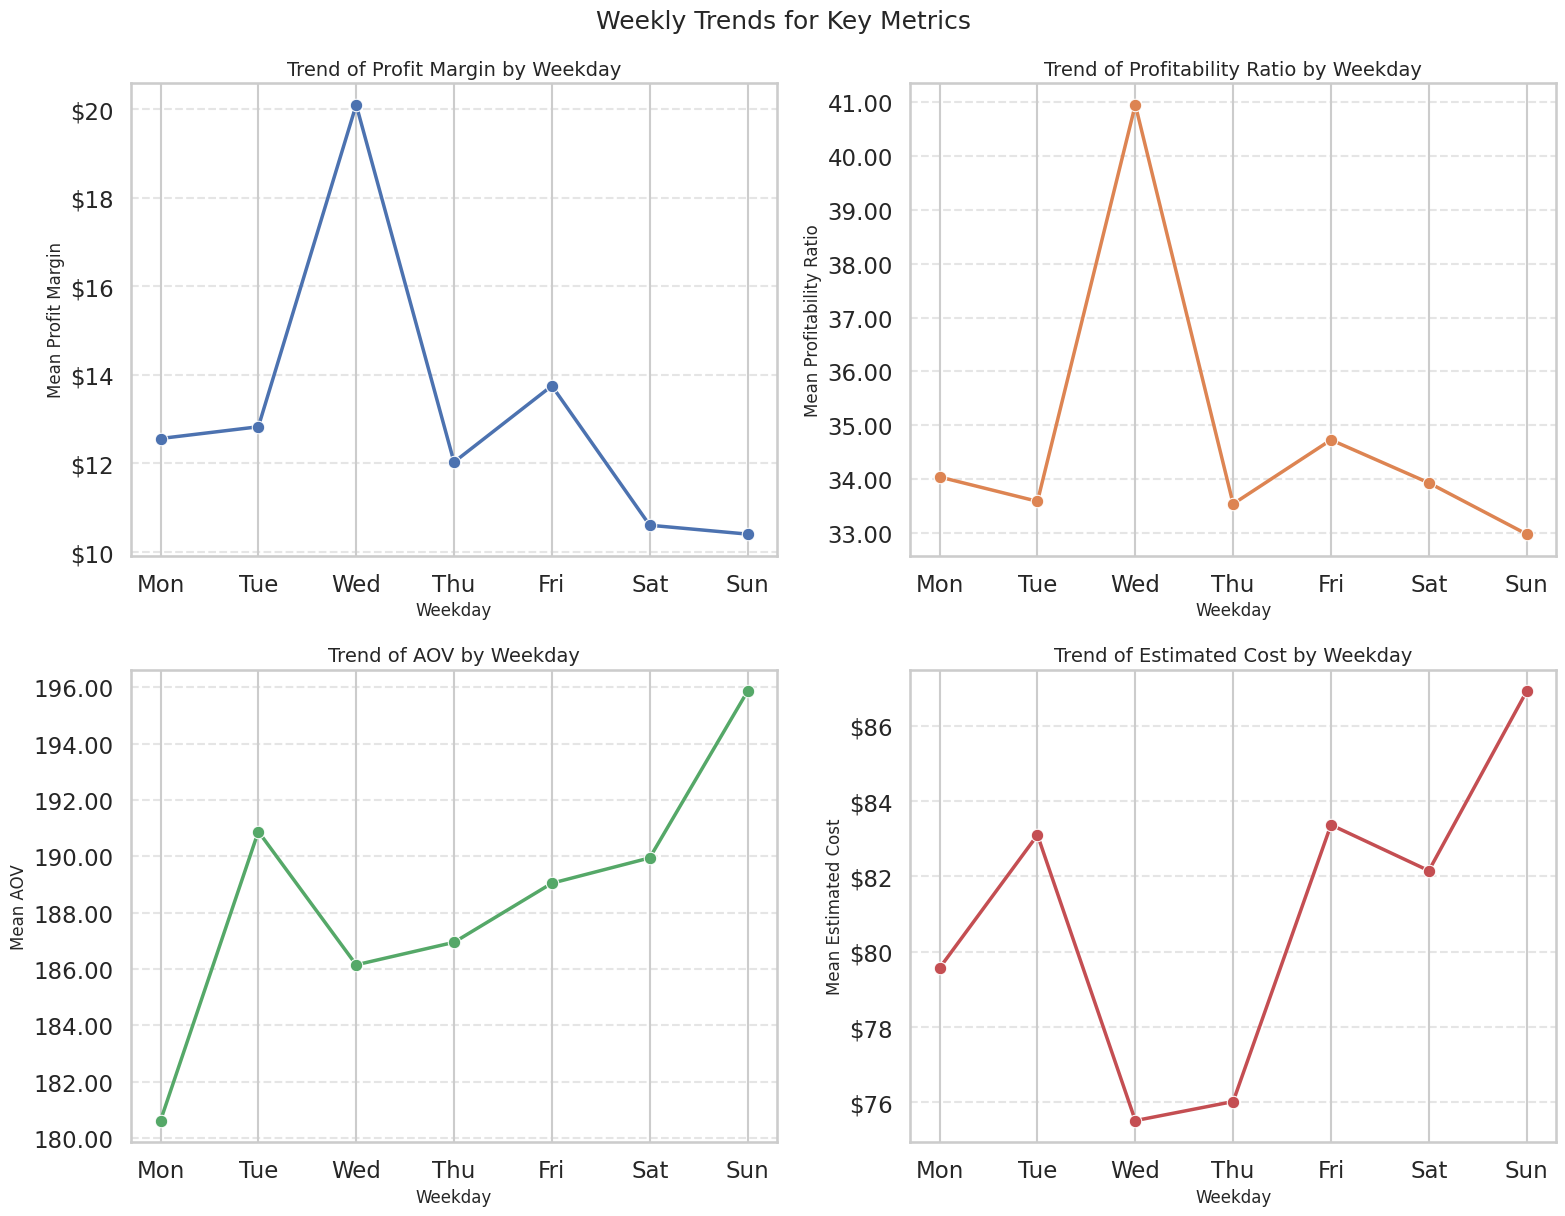

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Create a 2x2 grid for the metrics by weekday
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loop through the metrics and create line plots
for i, column in enumerate(columns_to_analyze):
    row, col = divmod(i, 2)  # Determine subplot position (row, column)

    # Calculate mean of each metric by weekday
    weekday_metric = data.groupby('Order Weekday Abbrev', observed=True)[column].mean().reset_index()

    # Lineplot: Metric trends by weekday
    sns.lineplot(
        data=weekday_metric,
        x='Order Weekday Abbrev',
        y=column,
        marker='o',
        color=f"C{i}",  # Different colors for each metric
        linewidth=2.5,
        ax=axes[row, col]
    )

    # Format the plot
    axes[row, col].set_title(f"Trend of {column} by Weekday", fontsize=14)
    axes[row, col].set_xlabel("Weekday", fontsize=12)
    axes[row, col].set_ylabel(f"Mean {column}", fontsize=12)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.5)
    if column in ['Profitability Ratio', 'AOV']:  # Non-currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    else:  # Currency metrics
        axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.suptitle("Weekly Trends for Key Metrics", fontsize=18, y=1.02)
plt.show()


### Sales by Day of Month

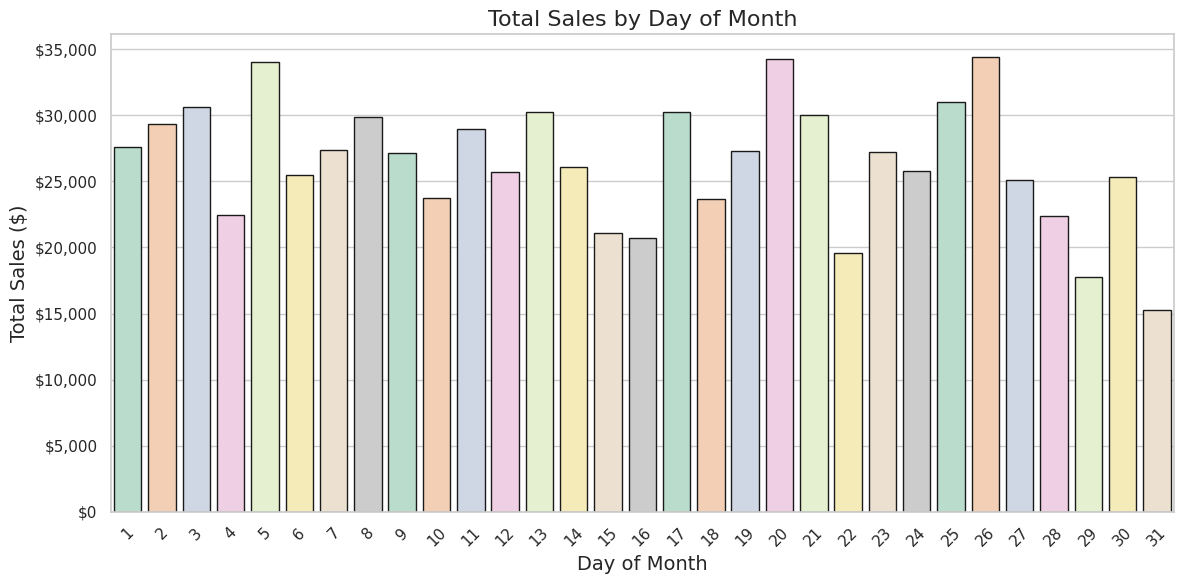

In [ ]:
# Aggregate sales by day of the month
day_of_month_sales = data.groupby('Order Day', observed=True)['Sales'].sum()

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2"

# Plot sales by day of the month
plt.figure(figsize=(12, 6))
sns.barplot(
    x=day_of_month_sales.index,
    y=day_of_month_sales.values,
    hue=day_of_month_sales.index, palette=palette,
    edgecolor="k", legend=False
)
plt.title("Total Sales by Day of Month", fontsize=16)
plt.xlabel("Day of Month", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.tight_layout()
plt.show()


## Data Prep Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Boxplot for original data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=data[column], color='skyblue')
        plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

        # Boxplot for filtered data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=filtered_data[column], color='lightgreen')
        plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

    return filtered_data, outliers



# def preprocess_data(data):
#     """
#     Prepares and preprocesses the Superstore dataset by cleaning and deriving metrics.
#     """
#     # Ensure the order and ship date columns are in datetime format
#     data['Order Date'] = pd.to_datetime(data['Order Date'])
#     data['Ship Date'] = pd.to_datetime(data['Ship Date'])

#     # Derived Metrics
#     data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
#     data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
#     data['Estimated Cost'] = data['Sales'] - data['Profit']
#     data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100
#     data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

#     customer_metrics = data.groupby('Customer ID').agg({
#         'Sales': 'sum',
#         'Profit': 'sum',
#         'Order ID': 'nunique'  # Number of orders
#     }).rename(columns={'Order ID': 'Order Count'})
#     data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
#     data['AOV'] = data['Sales_Customer'] / data['Order Count']

#     region_sales = data.groupby('Region')['Sales'].sum()
#     data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

#     category_profit = data.groupby('Category')['Profit'].sum()
#     subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()
#     data['Profit per Category'] = data['Category'].map(category_profit)
#     data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

#     # Standardize specific columns (optional step)
#     data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype(str).str.title()

#     return data

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning and deriving metrics,
    including Year-Over-Year (YOY) analysis for sales, profit, profit margin, and costs.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Extract the year for YOY analysis
    data['Order Year'] = data['Order Date'].dt.year

    # Derived Metrics
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
    data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
    data['Estimated Cost'] = data['Sales'] - data['Profit']
    data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100
    data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

    # YOY Metrics
    yearly_totals = (
        data.groupby('Order Year', observed=True)
        .agg(
            Total_Sales=('Sales', 'sum'),
            Total_Profit=('Profit', 'sum'),
            Total_Cost=('Estimated Cost', 'sum'),
            Avg_Profit_Margin=('Profit Margin', 'mean')
        )
        .reset_index()
    )

    # Calculate YOY changes
    yearly_totals['YOY_Sales_Change (%)'] = yearly_totals['Total_Sales'].pct_change() * 100
    yearly_totals['YOY_Profit_Change (%)'] = yearly_totals['Total_Profit'].pct_change() * 100
    yearly_totals['YOY_Cost_Change (%)'] = yearly_totals['Total_Cost'].pct_change() * 100
    yearly_totals['YOY_Profit_Margin_Change (%)'] = yearly_totals['Avg_Profit_Margin'].pct_change() * 100

    # Merge YOY metrics back to the original dataset
    data = data.merge(yearly_totals, on='Order Year', how='left')

    # Customer and regional metrics
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['AOV'] = data['Sales_Customer'] / data['Order Count']

    region_sales = data.groupby('Region')['Sales'].sum()
    data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

    category_profit = data.groupby('Category')['Profit'].sum()
    subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()
    data['Profit per Category'] = data['Category'].map(category_profit)
    data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

    # Standardize specific columns (optional step)
    data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype(str).str.title()

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    Retains numeric month columns for reference.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Month Numeric'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Year'] = data['Ship Date'].dt.year
    data['Ship Month Numeric'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert numeric months to month names
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    data['Order Month'] = data['Order Month Numeric'].apply(lambda x: month_names[x - 1])
    data['Ship Month'] = data['Ship Month Numeric'].apply(lambda x: month_names[x - 1])

    # Ensure month columns are ordered categorical variables
    month_categories = pd.CategoricalDtype(categories=month_names, ordered=True)
    data['Order Month'] = data['Order Month'].astype(month_categories)
    data['Ship Month'] = data['Ship Month'].astype(month_categories)

    # Convert year columns to categorical
    data['Order Year'] = data['Order Year'].astype('category')
    data['Ship Year'] = data['Ship Year'].astype('category')

    # Convert other time-based columns to categorical
    time_columns = ['Order Day', 'Order Weekday', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def order_categorical_columns(data):
    """
    Assigns a specific order to key categorical columns for proper visualization and analysis.

    Args:
        data (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: The updated dataset with ordered categorical columns.
    """
    # Define the specific order for weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Define the specific order for months
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Assign weekday order if the column exists
    if 'Order Weekday' in data.columns:
        data['Order Weekday'] = pd.Categorical(
            data['Order Weekday'],
            categories=weekday_order,
            ordered=True
        )

    # Assign month order if the column exists
    if 'Order Month' in data.columns:
        data['Order Month'] = pd.Categorical(
            data['Order Month'],
            categories=month_order,
            ordered=True
        )

    # Assign abbreviated month order if the column exists
    if 'Order Month Abbrev' in data.columns:
        abbrev_month_order = [
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ]
        data['Order Month Abbrev'] = pd.Categorical(
            data['Order Month Abbrev'],
            categories=abbrev_month_order,
            ordered=True
        )

    return data

def add_abbreviated_columns(data):
    """
    Adds abbreviated versions of 'Order Month' and 'Order Weekday' columns to the dataset,
    ensures they are stored as categorical types with the correct order.

    Args:
        data (pd.DataFrame): The dataset with ordered 'Order Month' and 'Order Weekday'.

    Returns:
        pd.DataFrame: The dataset with new abbreviated columns.
    """
    # Define abbreviations for months and weekdays
    month_order = {
        "January": "Jan", "February": "Feb", "March": "Mar", "April": "Apr",
        "May": "May", "June": "Jun", "July": "Jul", "August": "Aug",
        "September": "Sep", "October": "Oct", "November": "Nov", "December": "Dec"
    }

    weekday_order = {
        "Monday": "Mon", "Tuesday": "Tue", "Wednesday": "Wed", "Thursday": "Thu",
        "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"
    }

    # Map abbreviations to create new columns
    data['Order Month Abbrev'] = data['Order Month'].map(month_order)
    data['Order Weekday Abbrev'] = data['Order Weekday'].map(weekday_order)

    # Ensure the new columns are categorical with the correct order
    abbrev_month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    abbrev_weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    data['Order Month Abbrev'] = pd.Categorical(
        data['Order Month Abbrev'],
        categories=abbrev_month_order,
        ordered=True
    )

    data['Order Weekday Abbrev'] = pd.Categorical(
        data['Order Weekday Abbrev'],
        categories=abbrev_weekday_order,
        ordered=True
    )

    return data

def standardize_categorical_columns(data):
    """
    Standardizes all categorical columns by converting their values to title case.
    Ensures consistent formatting across categorical data.
    """
    # Select all categorical columns
    categorical_columns = data.select_dtypes(include='category').columns

    # Apply title case to each categorical column
    for column in categorical_columns:
        if data[column].dtype.name == 'category':  # Ensure it's a category column
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')

    # Verify changes
    print("Standardized Categorical Columns:")
    for column in categorical_columns:
        print(f"{column}: {data[column].unique()}")

    return data

def standardize_selected_categorical_columns(data, columns):
    """
    Standardizes specific categorical columns by converting their values to title case
    and ensures the columns remain as 'category' dtype.
    """
    for column in columns:
        if column in data.columns:
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.
    """
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

def prepare_data(
    data,
    outlier_column=None,
    exclude_columns=None,
    columns_to_standardize=None,
    threshold=25
):
    """
    Combines all data preparation steps into a single function for streamlined processing.

    Args:
        data (pd.DataFrame): The input dataset.
        outlier_column (str, optional): Column to perform outlier detection on.
        exclude_columns (list, optional): Columns to exclude from category conversion.
        columns_to_standardize (list, optional): Specific categorical columns to standardize.
        threshold (int, optional): Unique value threshold for category conversion. Default is 25.

    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    if exclude_columns is None:
        exclude_columns = [
            'Profit per Category', 'Profit per Sub-Category',
            'Regional Market Share (%)', 'Quantity', 'Order Count'
        ]

    if columns_to_standardize is None:
        columns_to_standardize = ['Region', 'Category', 'Sub-Category']

    if outlier_column:
        print(f"Step 0: Removing outliers from column '{outlier_column}'...\n")
        data, outliers = remove_outliers_tukey(data, column=outlier_column, plot=True)
        print(f"Outliers detected: {len(outliers)} rows sequestered for separate analysis.\n")

    print("Step 1: Preprocessing the data...")
    data = preprocess_data(data)

    print("Step 2: Adding time-based columns...")
    data = add_time_based_columns(data)

    print("Step 3: Converting to category and visualizing...\n")
    data = convert_to_category_and_visualize(data, threshold=threshold, exclude_columns=exclude_columns)

    print("\nStep 4: Removing duplicates...")
    data = remove_duplicates(data)

    print("Step 5: Standardizing selected categorical columns...\n")
    data = standardize_selected_categorical_columns(data, columns_to_standardize)

    print("Step 6: Ordering categorical columns...")
    data = order_categorical_columns(data)

    print("Step 7: Adding abbreviated columns...")
    data = add_abbreviated_columns(data)

    print("Data preparation completed!")
    return data


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

## Data Visualization Utils

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

def plot_yearly_sales(data, palette="Pastel1_r", title="Yearly Sales Analysis"):
    """
    Creates a 1x2 grid visualization for yearly sales analysis:
    - Barplot of total sales by year
    - Boxplot of sales distribution by year

    Args:
        data (pd.DataFrame): The dataset containing 'Order Year' and 'Sales' columns.
        palette (str): Seaborn color palette for the plots.
        title (str): Title for the overall figure.
    """
    # Set up Seaborn theme
    sns.set_theme(style="whitegrid", context="talk")

    # Step 1: Aggregate sales by year
    yearly_sales = data.groupby('Order Year', observed=True)['Sales'].sum()

    # Step 2: Convert sales to thousands for readability
    yearly_sales_k = yearly_sales / 1000

    # Step 3: Create a 1x2 grid for visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Total Sales by Year (Barplot)
    sns.barplot(
        x=yearly_sales_k.index, y=yearly_sales_k.values,
        hue=yearly_sales_k.index, palette=palette, edgecolor="black", ax=axes[0]
    )
    axes[0].set_title("Total Sales by Year (Barplot)", fontsize=16)
    axes[0].set_xlabel("Year", fontsize=14)
    axes[0].set_ylabel("Total Sales (in $K)", fontsize=14)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))

    # Plot 2: Sales Distribution by Year (Boxplot)
    sns.boxplot(
        data=data, x="Order Year", y="Sales",
        hue="Order Year", palette=palette, linewidth=1.5, ax=axes[1]
    )
    axes[1].set_title("Sales Distribution by Year (Boxplot)", fontsize=16)
    axes[1].set_xlabel("Year", fontsize=14)
    axes[1].set_ylabel("Sales ($)", fontsize=14)
    axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=18, y=1.02)
    plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>